In [54]:
from io import StringIO
import pandas as pd
import torch as t

days = t.arange(1, 31)
months = t.arange(1, 13)

days, months = t.meshgrid(days, months)

dayvmonth = t.stack((days, months), dim=-1).transpose(0, 1).flatten(0, 1)

# add a random temperature and humidity value
temps = t.randint(100, (dayvmonth.shape[0], 1), dtype=t.float32)
humidities = t.randint(50, (dayvmonth.shape[0], 1), dtype=t.float32)

dayvmonth = t.cat((dayvmonth, temps, humidities), dim=-1)

csv = "day,month,temperature,humidity\n"
for day, month, temp, hum in dayvmonth:
    csv += f"{int(day.item())},{int(month.item())},{temp.item()},{hum.item()}\n"

pd.read_csv(StringIO(csv)).to_csv("./temps_hums_by_day_by_month.csv", index=False)

In [1]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('kppkkp/OneChart', trust_remote_code=True, use_fast=False, padding_side="right")
model = AutoModel.from_pretrained('kppkkp/OneChart', trust_remote_code=True, low_cpu_mem_usage=True, device_map='cuda')
model = model.eval().cuda()


tokenizer_config.json:   0%|          | 0.00/870 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

modeling_OneChart.py:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

sam_vision_b.py:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/kppkkp/OneChart:
- sam_vision_b.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/kppkkp/OneChart:
- modeling_OneChart.py
- sam_vision_b.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/525M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [5]:
# # input your test image
# image_file = './climate-action.png'
# res = model.chat(tokenizer, image_file, reliable_check=False)
# print(res)

In [3]:
import numpy as np
np.random.rand()

0.9378316692396778

MLP([3, 3, 5, 3, 6])


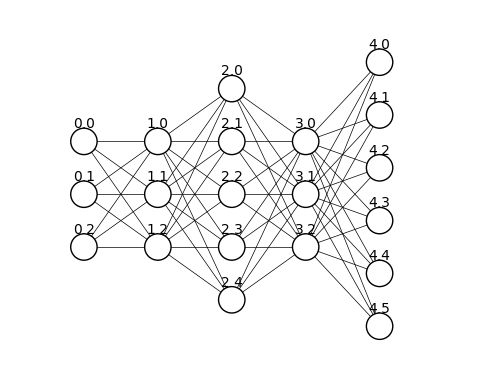

In [ ]:
from typing import Literal
import numpy as np
import torch as t
import matplotlib.pyplot as plt

# simple mlp
w = np.random.rand()
b = np.random.rand()



inp = 1
label = 1

data = [[inp, label]]

iters = 400

z = lambda x: w * x + b
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_deriviative = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# a is activation aka running input through z+sigmoid above = sigmoid(z(input))
simple_cost = lambda a, y: y - a
quad_cost = lambda a, y: (y - a) ** 2 / 2
ce_cost = lambda a, y: y * np.log(a) + (1 - y) * np.log(1 - a)
cost_fn_mapping = {
    "simple": simple_cost,
    "quad": quad_cost,
    "ce": ce_cost
}

class MLP:
    def __init__(self, layers, data = [], cost_fn: Literal["simple", "quad", "ce"] = "simple", iters = 500):
        self.data = data
        self.cost_fn = cost_fn_mapping[cost_fn]
        self.layers = layers

        # assume that the first layer is the input
        self.biases = [np.random.randn(n, 1) for n in layers[1:]]
        self.weights = [np.random.randn(this_n, prev_layer_n) for prev_layer_n, this_n in zip(layers[:-1], layers[1:])]

        self.iters = iters

    def forward(self, x):
        # take an input and pass it through the layers
        pass

    def backward(self):
        pass

    def draw(self):
        fig, ax = plt.subplots()
        layer_sizes = self.layers

        # Calculate the positions of the neurons in each layer
        v_spacing = 1.0 / float(max(layer_sizes) + 1)
        h_spacing = 1.0 / float(len(layer_sizes))

        # Nodes
        for n, layer_size in enumerate(layer_sizes):
            layer_top = v_spacing * (layer_size - 1) / 2.0
            for m in range(layer_size):
                circle = plt.Circle((n * h_spacing, layer_top - m * v_spacing), v_spacing / 4.0, color='w', ec='k', zorder=4)
                ax.add_artist(circle)
                # Annotate the neurons with their indices
                ax.annotate(f'{n},{m}', (n * h_spacing, layer_top - m * v_spacing), textcoords="offset points", xytext=(0,10), ha='center')

        # Edges
        for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
            layer_top_a = v_spacing * (layer_size_a - 1) / 2.0
            layer_top_b = v_spacing * (layer_size_b - 1) / 2.0
            for m in range(layer_size_a):
                for o in range(layer_size_b):
                    line = plt.Line2D([n * h_spacing, (n + 1) * h_spacing],
                                        [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k', lw=0.5)
                    ax.add_artist(line)

        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_xlim(-0.2, 1.1)
        ax.set_ylim(-0.5, 0.5)
        plt.show()


    def run(self):
        for i in range(self.iters):
            losses = []
            # pass all the data through the model one by one (issok no batching rn)
            for inp, label in data:
                out = self.forward(inp)
                # convert this output into a cost
                loss = self.cost_fn(out)
                losses.append(loss)

    def __repr__(self):
        print(f"MLP({self.layers})")
        self.draw()
        return ""

net = MLP([3, 3, 5, 3, 6])
net